In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load the .mat file
slp = loadmat(r'C:\Users\basha\anaconda3\envs\LabWork\predictiveCodingPcNeurons\slpsRun4\300323SE_run4_5_1\slp_final300323SE_run4_5_1.mat')

In [5]:
#slp

In [31]:
slp_data = slp['slp']

# Extract individual variables
spikes = slp_data['spikes']
patterns = slp_data['patterns']
sz = slp_data['sz']
sz = sz[0][0]


# Access the values of the extracted variables
spikes = spikes[0][0]
patterns = patterns[0][0]



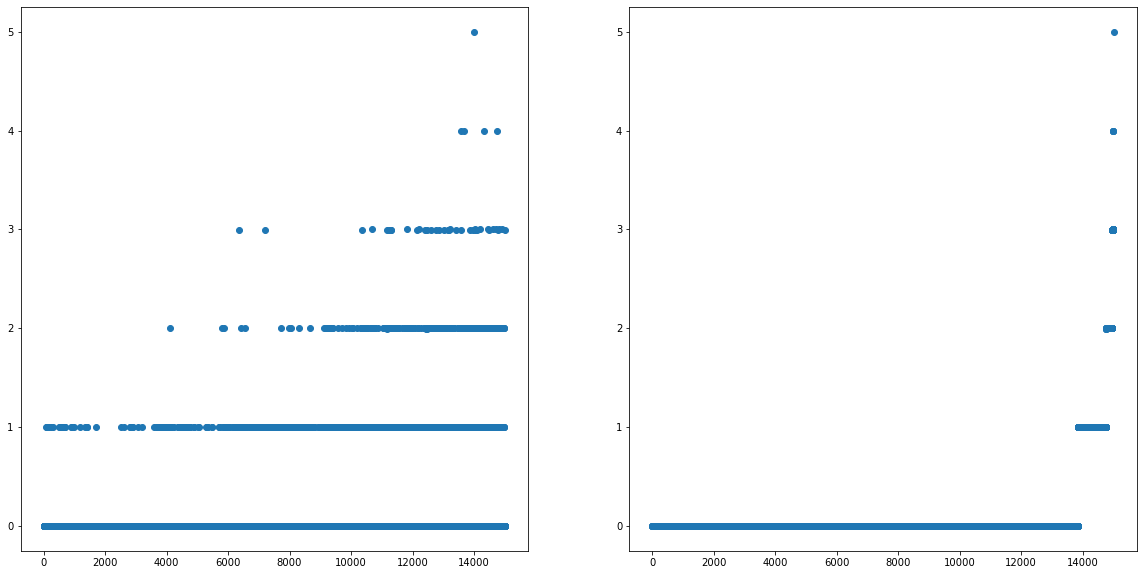

In [7]:
sorted_spikes = np.sort(spikes, axis=None)
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].scatter(np.arange(spikes.size),spikes)
axs[1].scatter(np.arange(sorted_spikes.size),sorted_spikes)


In [8]:
#patterns
spikes


array([[-1.93423598e-03, -1.93423598e-03, -1.93423598e-03, ...,
         2.99806576e+00,  0.00000000e+00, -1.93423598e-03]])

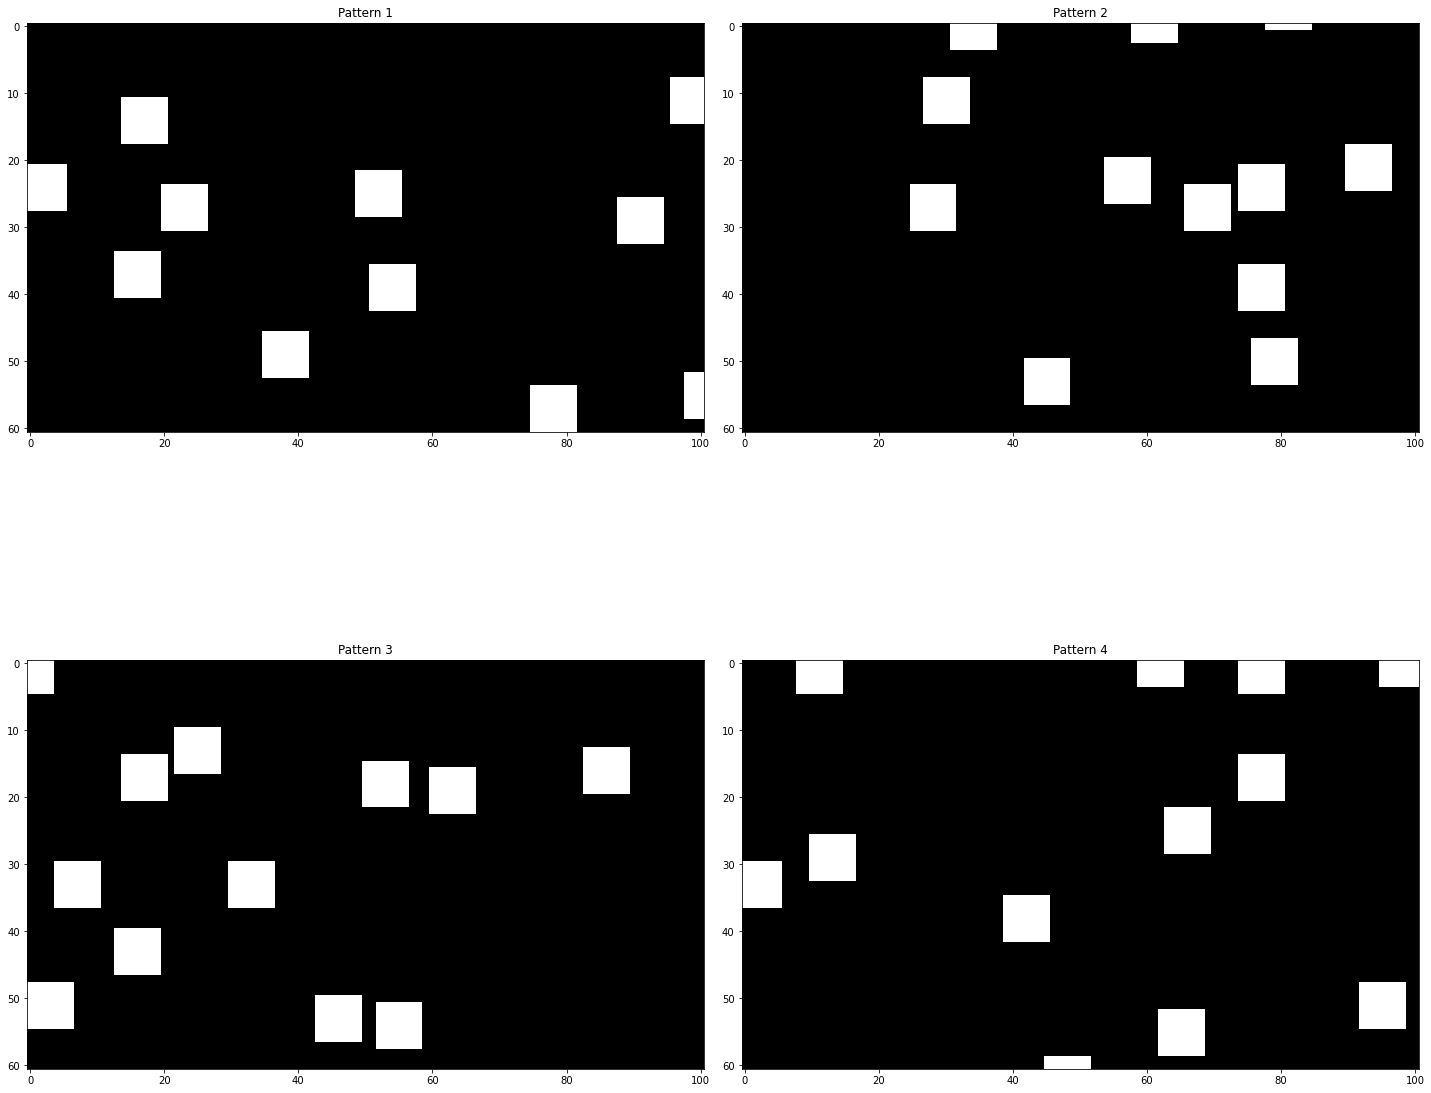

In [42]:
# Reshape the first 4 rows of patterns using the "sz" variable
patterns0 = patterns[0,:].reshape(sz[0][1], sz[0][0])
patterns1 = patterns[1,:].reshape(sz[0][1], sz[0][0])
patterns2 = patterns[2,:].reshape(sz[0][1], sz[0][0])
patterns3 = patterns[3,:].reshape(sz[0][1], sz[0][0])
reshaped_patterns = np.array([patterns0, patterns1, patterns2, patterns3])
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot the reshaped patterns
for i, ax in enumerate(axs.flat):
    ax.imshow(reshaped_patterns[i], cmap='gray')
    ax.set_title(f'Pattern {i+1}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

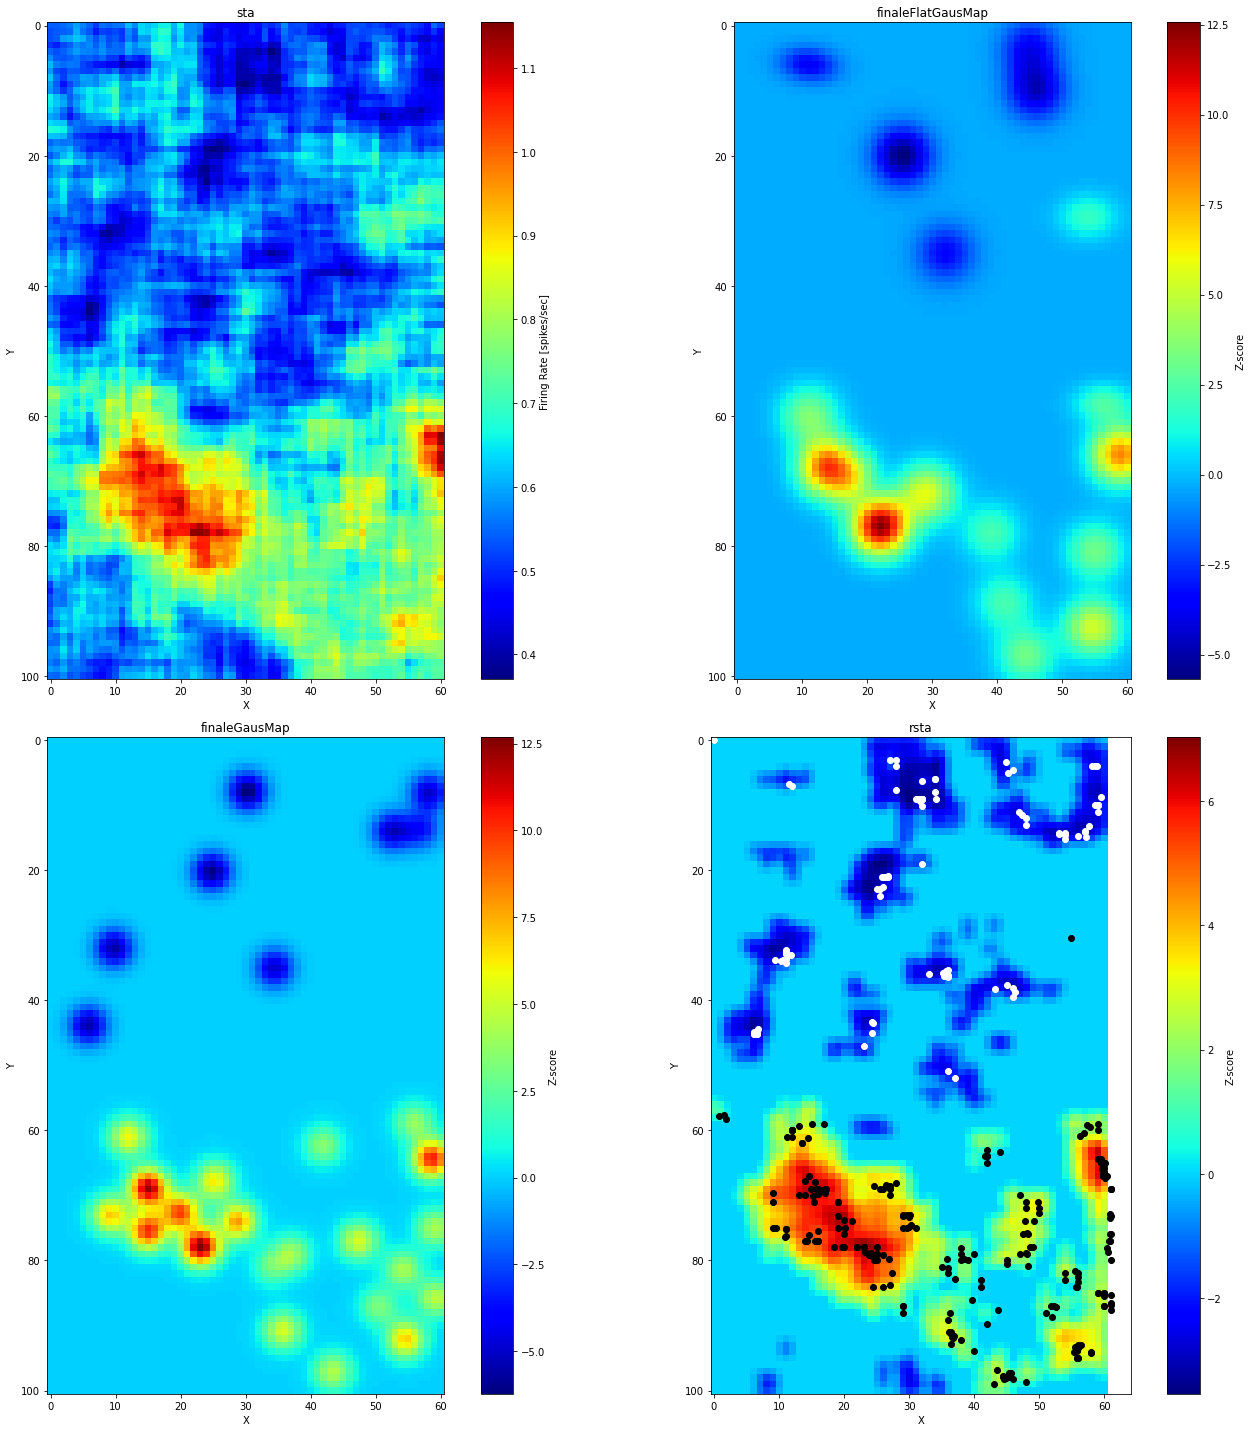

In [44]:


# Extract variables
sta = slp_data['sta'][0][0]
rsta = slp_data['rsta'][0][0]
exCenters = slp_data['wholecentres'][0][0]
inCenters = slp_data['wholeInCentres'][0][0]
finaleGausMap = slp_data['finaleGausMap'][0][0]
gausRec = slp_data['gausRec'][0][0]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot 'sta' with colorbar (firing rate)
im = axs[0, 0].imshow(sta,cmap='jet')
axs[0, 0].set_title('sta')
axs[0, 0].set_xlabel('X')
axs[0, 0].set_ylabel('Y')
cbar = fig.colorbar(im, ax=axs[0, 0])
cbar.set_label('Firing Rate [spikes/sec]')

# Plot 'rsta' with scatter of exCenters and inCenters, and colorbar (z-score)
im = axs[1, 1].imshow(rsta, cmap='jet')
axs[1, 1].scatter(exCenters[:, 0], exCenters[:, 1], color='black')
axs[1, 1].scatter(inCenters[:, 0], inCenters[:, 1], color='white')
axs[1, 1].set_title('rsta')
axs[1, 1].set_xlabel('X')
axs[1, 1].set_ylabel('Y')
cbar = fig.colorbar(im, ax=axs[1, 1])
cbar.set_label('Z-score')

# Plot 'finaleGausMap' with colorbar (z-score)
im = axs[1, 0].imshow(finaleGausMap, cmap='jet')
axs[1, 0].set_title('finaleGausMap')
axs[1, 0].set_xlabel('X')
axs[1, 0].set_ylabel('Y')
cbar = fig.colorbar(im, ax=axs[1, 0])
cbar.set_label('Z-score')

# Plot 'finaleFlatGausMap' with colorbar (z-score)
im = axs[0, 1].imshow(gausRec, cmap='jet')
axs[0, 1].set_title('finaleFlatGausMap')
axs[0, 1].set_xlabel('X')
axs[0, 1].set_ylabel('Y')
cbar = fig.colorbar(im, ax=axs[0, 1])
cbar.set_label('Z-score')

# Adjust the layout and spacing
plt.tight_layout()

# Display the subplots
plt.show()


In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression model
model = LinearRegression()

X = patterns

y = spikes.T
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

# Convert the negative mean squared error scores to positive
mse_scores = -cv_scores

# Compute the average MSE score
average_mse = np.mean(mse_scores)

In [88]:
average_mse

0.2684347894301887

In [89]:
mse_scores

array([0.17880104, 0.19475333, 0.21527524, 0.30498891, 0.44835543])

In [91]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit the model to your data
model.fit(X, y)

# Get the coefficients
coefficients = model.coef_



In [92]:
coefficients

array([[ 0.12636709, -0.10374631, -0.11133269, ...,  0.19580438,
        -1.0558609 ,  1.07616289]])

In [102]:
coefficientsMat = coefficients[0,:].reshape(sz[0][1], sz[0][0])
coefficientsMat

array([[ 1.26367092e-01, -1.03746311e-01, -1.11332691e-01, ...,
         1.58566999e-01, -1.97720769e-01,  1.20160205e-01],
       [-1.78476403e-01,  3.81807672e-01, -1.61866869e-01, ...,
         8.03329893e-04,  1.17901891e+00, -1.17353523e+00],
       [ 1.42454649e-02, -2.69812619e-01,  3.48678900e-01, ...,
        -2.03728025e-01, -1.61267504e+00,  1.66465272e+00],
       ...,
       [-1.01779597e-01, -7.39977691e-02,  1.02027342e-01, ...,
        -2.21810919e-02,  4.39565685e-01, -4.39591014e-01],
       [ 4.08741347e-01, -3.85809019e-01, -4.54639830e-02, ...,
        -2.49117453e-01,  8.49736180e-01, -7.53500821e-01],
       [-2.35613653e-01,  2.38169654e-01,  2.17326707e-02, ...,
         1.95804384e-01, -1.05586090e+00,  1.07616289e+00]])

C:\Users\basha\AppData\Local\Temp/ipykernel_2908/561362648.py:8: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(im)


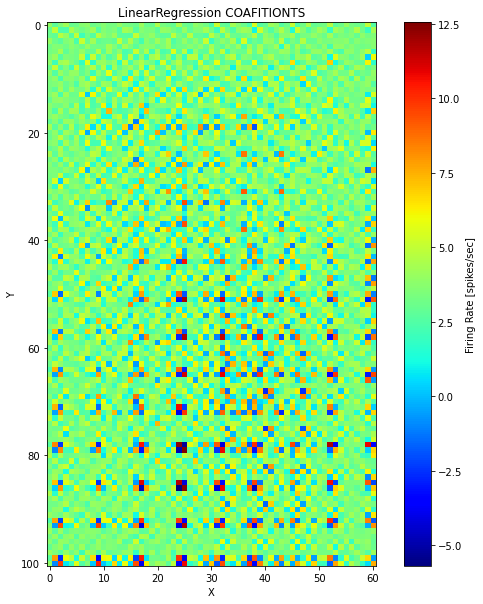

In [103]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))

# Plot 'sta' with colorbar (firing rate)
axs.imshow(coefficientsMat.T,cmap='jet')
axs.set_title('LinearRegression COAFITIONTS')
axs.set_xlabel('X')
axs.set_ylabel('Y')
cbar = fig.colorbar(im)
cbar.set_label('Firing Rate [spikes/sec]')

In [107]:

# Create a linear regression model
model = LinearRegression()

# Normalize the spike counts by subtracting the mean and dividing by the standard deviation
y = ((spikes - np.mean(spikes)) / np.std(spikes)).T

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive
mse_scores = -cv_scores

# Compute the average MSE score
average_mse = np.mean(mse_scores)



In [110]:
mse_scores

array([1.35613998, 1.47713227, 1.63278336, 2.31322855, 3.40061073])

C:\Users\basha\AppData\Local\Temp/ipykernel_2908/2524349302.py:21: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(im)


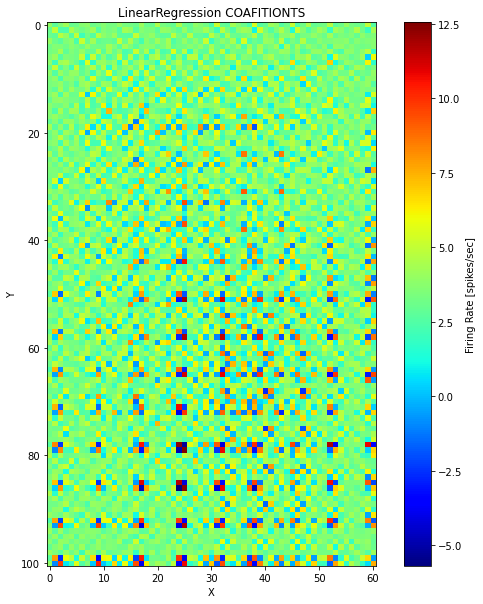

In [105]:
# Fit the model to your data
model = LinearRegression()

y = ((spikes - np.mean(spikes)) / np.std(spikes)).T

model.fit(X, y)

# Get the coefficients
coefficients = model.coef_

coefficientsMat = coefficients[0,:].reshape(sz[0][1], sz[0][0])

fig, axs = plt.subplots(1, 1, figsize=(10, 10))

# Plot 'sta' with colorbar (firing rate)
axs.imshow(coefficientsMat.T,cmap='jet')
axs.set_title('LinearRegression COAFITIONTS')
axs.set_xlabel('X')
axs.set_ylabel('Y')
cbar = fig.colorbar(im)
cbar.set_label('Firing Rate [spikes/sec]')

C:\Users\basha\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Iteration 1: MSE - 0.7081053349044801
Iteration 2: MSE - 0.7081053349044774
Iteration 3: MSE - 0.7074214847722821
Iteration 4: MSE - 0.707596030464185
Iteration 5: MSE - 0.7093499461609696
Iteration 6: MSE - 0.7077833119807987
Iteration 7: MSE - 0.707819962401642
Iteration 8: MSE - 0.707512356150545
Iteration 9: MSE - 0.7017235267388384
Iteration 10: MSE - 0.7075395555980943
Iteration 11: MSE - 0.7122220039910747
Iteration 12: MSE - 0.7022924614567793
Iteration 13: MSE - 0.7145910700889108
Iteration 14: MSE - 0.705600032191349
Iteration 15: MSE - 0.7049832315918756
Iteration 16: MSE - 0.7082221300017157
Iteration 17: MSE - 0.7046996238824949
Iteration 18: MSE - 0.706377560240922
Iteration 19: MSE - 0.7086838370676853
Iteration 20: MSE - 0.689610890226363
Iteration 21: MSE - 0.6863016688071187
Iteration 22: MSE - 0.6911039169913795
Iteration 23: MSE - 0.6909556864803615
Iteration 24: MSE - 0.694321189973794
Iteration 25: MSE - 0.6957597928296714
Iteration 26: MSE - 0.6959760631088451
It

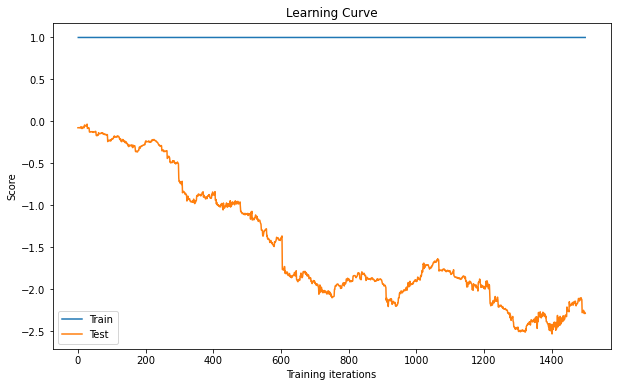

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Normalize the spike counts by subtracting the mean and dividing by the standard deviation
y = ((spikes - np.mean(spikes)) / np.std(spikes)).T
X = patterns

# Generate random data
np.random.seed(99)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, train_size=0.1, random_state=99)

# Initialize the Linear Regression model
model = LinearRegression()

# Function to plot the learning curve
def plot_learning_curve(train_scores, test_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(train_scores, label='Train')
    plt.plot(test_scores, label='Test')
    plt.xlabel('Training iterations')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

# Train and test the model
train_scores = []
test_scores = []

for i in range(1, len(X_train)+1):
    # Fit the model
    model.fit(X_train[:i], y_train[:i])

    # Calculate the training and test scores
    train_score = model.score(X_train[:i], y_train[:i])
    test_score = model.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

    # Print the coefficients and intercept

    print(f"Iteration {i}: train_score - {train_score}: test_score - {test_score}")

# Plot the learning curve
plot_learning_curve(train_scores, test_scores)


C:\Users\basha\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


1 nan -0.07490257526376509
2 0.0 -0.07490257526376132
3 -0.12499999999914424 -0.07311711917126362
4 -0.3333333333309667 -0.07311711917126362
5 -0.5624999999960774 -0.07311711917126362
6 -0.7999999999945226 -0.07311711917126362
7 -1.0416666666596401 -0.07311711917126362
8 -0.3333333333301214 -0.07311711917126362
9 -0.12499999999819345 -0.07311711917126362
10 -0.19047619047391362 -0.07311711917126362
11 -0.08035714285573414 -0.07311711917126362
12 -0.12499999999843103 -0.07311711917126362
13 -0.05624999999898028 -0.07311711917126362
14 -0.08888888888773194 -0.07311711917126362
15 -0.12499999999874478 -0.07311711917126362
16 -0.06666666666577403 -0.07311711917126362
17 -0.032142857142247516 -0.07311711917126362
18 -0.05194805194723795 -0.07311711917126362
19 -0.025568181817618107 -0.07311711917126362
20 0.5351681632653067 -0.01006334617023863
21 0.5332701596374918 -0.010534287315208113
22 0.5313207133053408 -0.01110528188027371
23 0.530888295305062 -0.011377442274280725
24 0.5252009897089

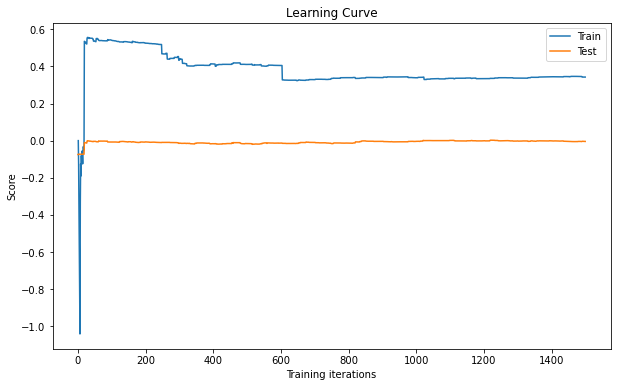

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Normalize the spike counts by subtracting the mean and dividing by the standard deviation
y = ((spikes - np.mean(spikes)) / np.std(spikes)).T.reshape(-1)
X = patterns

# Generate random data
np.random.seed(99)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, train_size=0.1, random_state=99)

# Initialize the SVR model
model = SVR(kernel='rbf')

# Function to plot the learning curve
def plot_learning_curve(train_scores, test_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(train_scores, label='Train')
    plt.plot(test_scores, label='Test')
    plt.xlabel('Training iterations')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

# Train and test the model
train_scores = []
test_scores = []

for i in range(1, len(X_train)+1):
    # Fit the model
    model.fit(X_train[:i], y_train[:i])

    # Calculate the training and test scores
    train_score = model.score(X_train[:i], y_train[:i])
    test_score = model.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

    print(i , train_score, test_score)


# Plot the learning curve
plot_learning_curve(train_scores, test_scores)


Epoch 1/10
375/375 [==============================] - 59s 155ms/step - loss: 0.1537 - accuracy: 0.3485 - val_loss: 0.1381 - val_accuracy: 0.3337
Epoch 2/10
375/375 [==============================] - 58s 155ms/step - loss: 0.1304 - accuracy: 0.3537 - val_loss: 0.1379 - val_accuracy: 0.3337
Epoch 3/10
375/375 [==============================] - 72s 193ms/step - loss: 0.1304 - accuracy: 0.3537 - val_loss: 0.1378 - val_accuracy: 0.3337
Epoch 4/10
375/375 [==============================] - 83s 221ms/step - loss: 0.1304 - accuracy: 0.3537 - val_loss: 0.1378 - val_accuracy: 0.3337
Epoch 5/10
375/375 [==============================] - 83s 222ms/step - loss: 0.1304 - accuracy: 0.3537 - val_loss: 0.1377 - val_accuracy: 0.3337
Epoch 6/10
375/375 [==============================] - 92s 245ms/step - loss: 0.1304 - accuracy: 0.3537 - val_loss: 0.1379 - val_accuracy: 0.3337
Epoch 7/10
375/375 [==============================] - 76s 203ms/step - loss: 0.1304 - accuracy: 0.3537 - val_loss: 0.1377 - val_ac

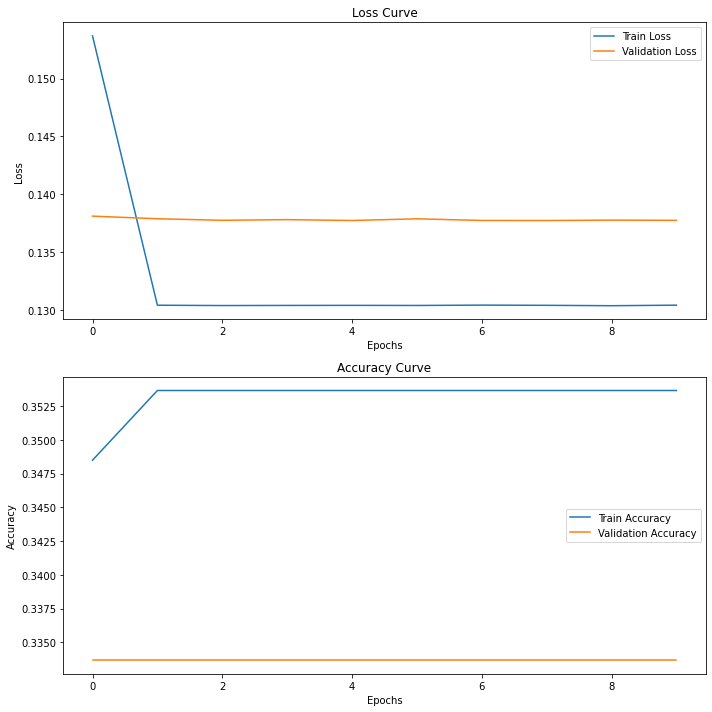

94/94 [==============================] - 3s 36ms/step
Train MSE: 0.13036986631635325
Test MSE: 0.13774895607963075


In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Generate random image data
np.random.seed(99)
image_shape = sz[0]
y = spikes.T.reshape(-1)
X = patterns
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=99)

# Normalize the image data

# Initialize the NN model
model = Sequential()
model.add(Dense(X_train.shape[1], input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Get the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create subplots for loss and validation loss, and accuracy and validation accuracy
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot the loss and validation loss
axs[0].plot(train_loss, label='Train Loss')
axs[0].plot(val_loss, label='Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_title('Loss Curve')
axs[0].legend()

# Plot the accuracy and validation accuracy
axs[1].plot(train_acc, label='Train Accuracy')
axs[1].plot(val_acc, label='Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy Curve')
axs[1].legend()

plt.tight_layout()
plt.show()

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")


# CNN for slp regression prediction of firing rate

Epoch 1/10
375/375 [==============================] - 34s 90ms/step - loss: 0.1624 - accuracy: 0.3518 - val_loss: 0.1384 - val_accuracy: 0.3337
Epoch 2/10
375/375 [==============================] - 36s 96ms/step - loss: 0.1305 - accuracy: 0.3537 - val_loss: 0.1378 - val_accuracy: 0.3337
Epoch 3/10
375/375 [==============================] - 36s 95ms/step - loss: 0.1304 - accuracy: 0.3537 - val_loss: 0.1378 - val_accuracy: 0.3337
Epoch 4/10
375/375 [==============================] - 36s 95ms/step - loss: 0.1304 - accuracy: 0.3537 - val_loss: 0.1377 - val_accuracy: 0.3337
Epoch 5/10
375/375 [==============================] - 36s 96ms/step - loss: 0.1304 - accuracy: 0.3537 - val_loss: 0.1377 - val_accuracy: 0.3337
Epoch 6/10
375/375 [==============================] - 36s 96ms/step - loss: 0.1304 - accuracy: 0.3537 - val_loss: 0.1378 - val_accuracy: 0.3337
Epoch 7/10
375/375 [==============================] - 36s 96ms/step - loss: 0.1304 - accuracy: 0.3537 - val_loss: 0.1378 - val_accuracy:

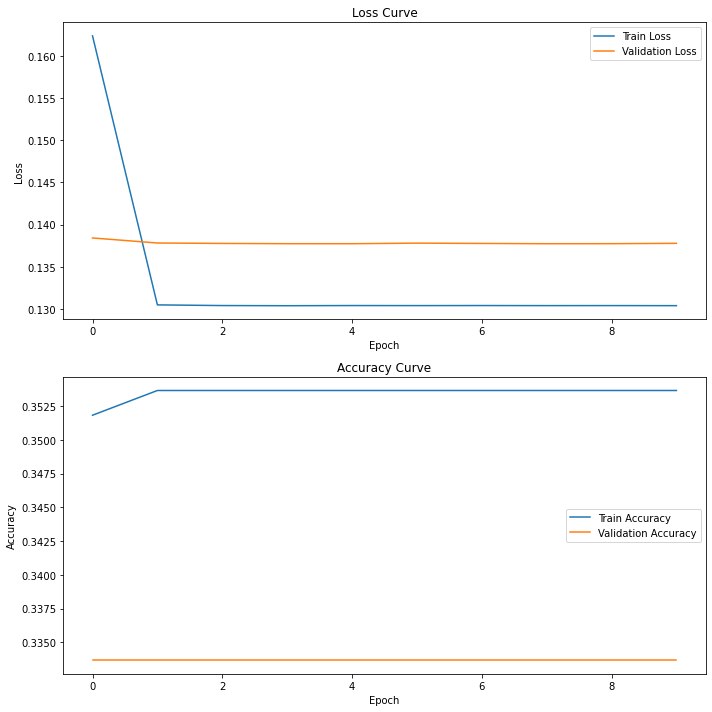

94/94 [==============================] - 3s 27ms/step
Train MSE: 0.13037787699100173
Test MSE: 0.13778813290256775


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import mean_squared_error

# Generate random image data
np.random.seed(99)
image_shape = sz[0]
y = spikes.T.reshape(-1)
X = patterns

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=99)

# Reshape the data to match CNN input requirements
X_train = X_train.reshape(-1, image_shape[0], image_shape[1], 1)
X_test = X_test.reshape(-1, image_shape[0], image_shape[1], 1)

# Initialize the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_shape[0], image_shape[1], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Get the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the loss and accuracy curves
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot the loss curve
axs[0].plot(train_loss, label='Train Loss')
axs[0].plot(val_loss, label='Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Loss Curve')
axs[0].legend()

# Plot the accuracy curve
axs[1].plot(train_acc, label='Train Accuracy')
axs[1].plot(val_acc, label='Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy Curve')
axs[1].legend()

plt.tight_layout()
plt.show()

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")


# validation of CNN for slp regression prediction of firing rate by sufuling the target vec (FR vec)

Epoch 1/10
375/375 [==============================] - 35s 91ms/step - loss: 0.1455 - accuracy: 0.3523 - val_loss: 0.1377 - val_accuracy: 0.3337
Epoch 2/10
375/375 [==============================] - 38s 100ms/step - loss: 0.1302 - accuracy: 0.3537 - val_loss: 0.1383 - val_accuracy: 0.3337
Epoch 3/10
375/375 [==============================] - 38s 101ms/step - loss: 0.1292 - accuracy: 0.3537 - val_loss: 0.1389 - val_accuracy: 0.3337
Epoch 4/10
375/375 [==============================] - 37s 100ms/step - loss: 0.1269 - accuracy: 0.3537 - val_loss: 0.1392 - val_accuracy: 0.3337
Epoch 5/10
375/375 [==============================] - 38s 101ms/step - loss: 0.1224 - accuracy: 0.3537 - val_loss: 0.1401 - val_accuracy: 0.3337
Epoch 6/10
375/375 [==============================] - 38s 102ms/step - loss: 0.1170 - accuracy: 0.3538 - val_loss: 0.1440 - val_accuracy: 0.3337
Epoch 7/10
375/375 [==============================] - 41s 110ms/step - loss: 0.1069 - accuracy: 0.3539 - val_loss: 0.1566 - val_acc

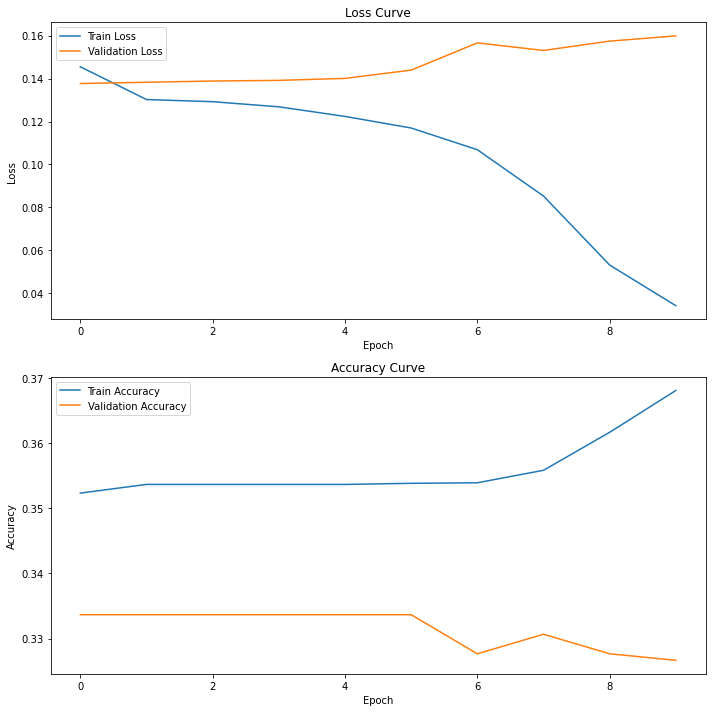

94/94 [==============================] - 2s 24ms/step
Train MSE: 0.02542206650380056
Test MSE: 0.15990845256630087


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import mean_squared_error

# Generate random image data
np.random.seed(99)
image_shape = sz[0]
y = spikes.T.reshape(-1)
np.random.shuffle(y)
X = patterns

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=99)

# Reshape the data to match CNN input requirements
X_train = X_train.reshape(-1, image_shape[0], image_shape[1], 1)
X_test = X_test.reshape(-1, image_shape[0], image_shape[1], 1)

# Initialize the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_shape[0], image_shape[1], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Get the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the loss and accuracy curves
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot the loss curve
axs[0].plot(train_loss, label='Train Loss')
axs[0].plot(val_loss, label='Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Loss Curve')
axs[0].legend()

# Plot the accuracy curve
axs[1].plot(train_acc, label='Train Accuracy')
axs[1].plot(val_acc, label='Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy Curve')
axs[1].legend()

plt.tight_layout()
plt.show()

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate MSE
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")


array([-0.00193424, -0.00193424, -0.00193424, ..., -0.00193424,
       -0.00193424, -0.00193424])